# 5.4 Text processing

Course's materials require a `tensorflow` version lower than the default one used in Google Colab. Run the following cell to downgrade TensorFlow accordingly.

In [ ]:
import os
def downgrade_tf_version():
    os.system("!yes | pip uninstall -y tensorflow")
    os.system("!yes | pip install tensorflow==2.12.0")
    os.kill(os.getpid(), 9)
downgrade_tf_version()

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

There exists several applications that require the processing of text, e.g. machine translation, sentiment analysis, semantic word similarity, part of speech tagging, to name just a few. However, in order to solve those problems, the text needs to be transformed into something that can be understood by the models. In the following some of the basic preprocessing steps that must be applied to text are going to be presented.

Natural Language Toolkit
https://www.nltk.org/index.html

NLTK is a platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

## Tokenization

This process assigns a unique number to every word (or character) in the dataset. Tokenization requires to set up the maximum number of fatures or words to be included in the tokenizer.  

In [2]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize 

text = 'ejemplo de texto a ser procesado'
word_tokenize(text)

[nltk_data] Downloading package punkt to /home/julian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['ejemplo', 'de', 'texto', 'a', 'ser', 'procesado']

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = 'ejemplo de texto a ser procesado ejemplo'

max_fatures = 8
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts([text])
X = tokenizer.texts_to_sequences([text])
print([text])
print(X)

['ejemplo de texto a ser procesado ejemplo']
[[1, 2, 3, 4, 5, 6, 1]]


In [4]:
#Dictionary
tokenizer.word_index

{'ejemplo': 1, 'de': 2, 'texto': 3, 'a': 4, 'ser': 5, 'procesado': 6}

If there are more unique words in the text than **num_words**, only the most frequent ones are given a unique token.

## Depending on the task, it may be necessary to eliminate some words such as prepositions

In [5]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /home/julian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for word in nltk.word_tokenize(text) if word not in stopwords]
    return tokens
print(tokenize_only(text))

['ejemplo', 'texto', 'ser', 'procesado', 'ejemplo']


## Document representations

### Bag of words

The most basic representation of a document is based on a One-hot encoding of the tokenized text. In other words, every text is represented as a vector of 0's and only one '1' in the position given by the index of the words in te text, according to the ones assigned during tokenization. The length of the vector corresponds to the parameter **num_words**, which is the size of the dictionary. 

Based on a bag of words representation a whole paragraph or document could be codified as a vector of num_words positions, where the position $i$ accounts for the number of times that the word $i$ appeared in the text. Usually, such vector is normalized with respecto the number of words in the text, this is call *term-frecuency* representation. However, it is more common to use the tf-idf representetation.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

synopses = []
synopses.append('ejemplo de texto a ser procesado')
synopses.append('algunos ejemplos puenden ser más complejos que otros ejemplos')
synopses.append('No se si sea posible dar algunos ejemplos')

#define vectorizer parameters
count_vectorizer = CountVectorizer(max_df=0.9, max_features=200,
                                 min_df=0.1)

%time count_matrix = count_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(count_matrix.shape)
count_matrix.toarray()

CPU times: user 569 µs, sys: 272 µs, total: 841 µs
Wall time: 607 µs
(3, 18)


array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]])

In [8]:
count_vectorizer.get_feature_names()

['algunos',
 'complejos',
 'dar',
 'de',
 'ejemplo',
 'ejemplos',
 'más',
 'no',
 'otros',
 'posible',
 'procesado',
 'puenden',
 'que',
 'se',
 'sea',
 'ser',
 'si',
 'texto']

### Stemming

In [9]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
synopsesStem = []
for sentence in synopses:
     synopsesStem.append(" ".join([stemmer.stem(word) for word in sentence.split()]))
#define vectorizer parameters
count_vectorizer = CountVectorizer(max_df=1.0, max_features=200,
                                 min_df=0.1)

count_matrix = count_vectorizer.fit_transform(synopsesStem) #fit the vectorizer to synopses
count_vectorizer.get_feature_names()

['algun',
 'complej',
 'dar',
 'de',
 'ejempl',
 'mas',
 'no',
 'otros',
 'posibl',
 'proces',
 'puend',
 'que',
 'se',
 'sea',
 'ser',
 'si',
 'text']

In [10]:
print(count_matrix.shape)
count_matrix.toarray()

(3, 17)


array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]])

This provides a matrix with a row per document and a column per word in the dictionary. The position [$i$, $j$] corresponds to the number of times the word $j$ appeared in the document $i$.  

**Home work**: [Read about the difference between steeming and lemmatization](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/)

### tf-idf representation

This stands for term frequency and inverse document frequency. The tf-idf weighting scheme assigns to term $t$ a weight in document $d$ given by

$$
\mbox{tf-idf}_{t,d} = \mbox{tf}_{t,d} \times \mbox{idf}_t.$$

**Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

$$\mbox{tf}_{t,d} = \frac{n_{t,d}}{\sum_k n_{k,d}} $$

**Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.

$$\mbox{idf}_{t} = \log\left(\frac{N}{df_t}\right) + 1; \; df_t = \text{number of documents contaning } t $$

In other words, $\mbox{tf-idf}_{t,d}$ assigns to term $t$ a weight in document $d$ that is

- highest when $t$ occurs many times within a small number of documents (thus lending high discriminating power to those documents);
- lower when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);

- lowest when the term occurs in virtually all documents.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=200,
                                 min_df=0.1, stop_words=stopwords,
                                 use_idf=True, tokenizer= word_tokenize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopsesStem) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print(tfidf_matrix.toarray())

CPU times: user 15.2 ms, sys: 446 µs, total: 15.7 ms
Wall time: 15 ms
(3, 33)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.20977061 0.         0.         0.35517252
  0.35517252 0.         0.         0.         0.         0.
  0.         0.35517252 0.         0.         0.         0.27011786
  0.         0.         0.35517252 0.         0.         0.
  0.35517252 0.35517252 0.35517252]
 [0.18936073 0.18936073 0.2489866  0.2489866  0.2489866  0.
  0.         0.         0.294111   0.2489866  0.2489866  0.
  0.         0.2489866  0.2489866  0.2489866  0.         0.
  0.         0.         0.2489866  0.2489866  0.2489866  0.18936073
  0.2489866  0.2489866  0.         0.         0.         0.
  0.         0.         0.        ]
 [0.23464049 0.23464049 0.         0.         0.         0.30852405
  0.30852405 0.30852405 0.18221927 0.         0.         0.
  0.         0.         0.         0.         0.30852405 0.30852405
  0.30852405 0.         0.    

In [12]:
print(dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_)))

{'algun': 1.2876820724517808, 'algun ejempl': 1.2876820724517808, 'algun ejempl puend': 1.6931471805599454, 'complej': 1.6931471805599454, 'complej ejempl': 1.6931471805599454, 'dar': 1.6931471805599454, 'dar algun': 1.6931471805599454, 'dar algun ejempl': 1.6931471805599454, 'ejempl': 1.0, 'ejempl puend': 1.6931471805599454, 'ejempl puend ser': 1.6931471805599454, 'ejempl text': 1.6931471805599454, 'ejempl text ser': 1.6931471805599454, 'mas': 1.6931471805599454, 'mas complej': 1.6931471805599454, 'mas complej ejempl': 1.6931471805599454, 'posibl': 1.6931471805599454, 'posibl dar': 1.6931471805599454, 'posibl dar algun': 1.6931471805599454, 'proces': 1.6931471805599454, 'puend': 1.6931471805599454, 'puend ser': 1.6931471805599454, 'puend ser mas': 1.6931471805599454, 'ser': 1.2876820724517808, 'ser mas': 1.6931471805599454, 'ser mas complej': 1.6931471805599454, 'ser proces': 1.6931471805599454, 'si': 1.6931471805599454, 'si posibl': 1.6931471805599454, 'si posibl dar': 1.693147180559

## Word embeddings

### word2vec

There exist several alternatives to represent the words in a different way. In most of the cases, those techniques try to take advantage on the semantic similarity of the words. Such similarity can be sintacmatic or paradigmatic. Paradigmatic similarity refers to the interchange of words. On the other hand, sintacmatic similarity refers to co-ocurrence.

Two of the most used techniques are based on Neural Network representations:

- **skip-gram** model: This architecture is designed to predict the context given a word

- **Continuous Bag of Words (CBOW)**: The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

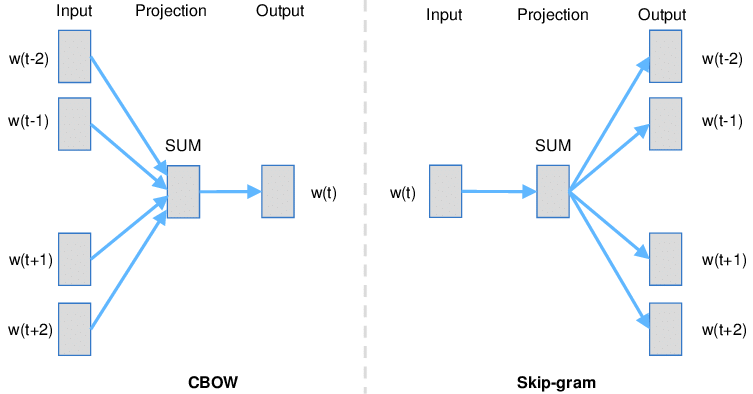

In [31]:
from IPython.display import Image, display
Image(filename='local/imgs/word2vec.png', width=800)
#![alt text](local/imgs/word2vec.png "skipgram")


According to Mikolov (https://arxiv.org/pdf/1310.4546.pdf):

Skip-gram: works well with small amount of the training data, represents well even rare words or phrases.

CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words

### Alternative activation functions

One of the problems with word2vec architecture is the large number of outputs, which increases a lot the computational cost. In order to tackle this problem, there are two approaches:

- **Hierarchical softmax**: This use a binary tree to represent the probabilities of the words at the output layer an reduces the computational cost logarithmically. The output layer is replaced by sigmoid functions representing the decision in every node of the tree.

https://www.iro.umontreal.ca/~lisa/pointeurs/hierarchical-nnlm-aistats05.pdf


- **Negative sampling**: Negative sampling addresses the computational problem by having each training sample only modify a small percentage of the weights, rather than all of them. 

https://arxiv.org/pdf/1310.4546.pdf

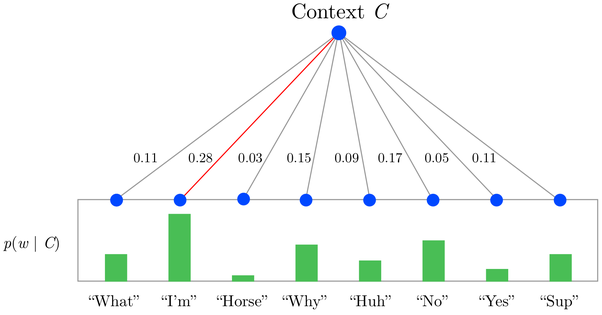

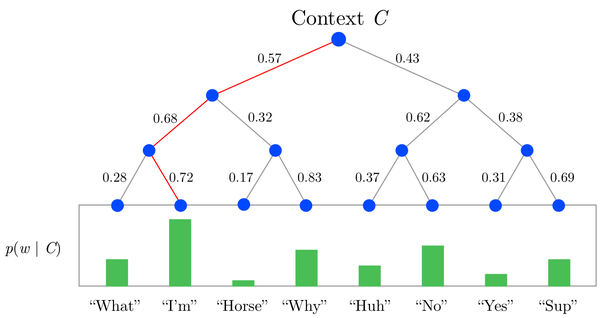

In [33]:
A = Image(filename='local/imgs/Softmax.png', width=600)
B = Image(filename='local/imgs/HSoftmax.png', width=600)
display(A, B)

[Image taken from here](https://medium.com/@ionejunhong/my-machine-learning-diary-day-78-c36d602ca9bf)

In [13]:
import bs4 as bs  
import urllib.request
import re  
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')  
article = scrapped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text

In [14]:
# Cleaing the text
processed_article = article_text.lower()  
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):  
    all_words = [[' '.join(w for w in all_words[i] if w not in stopwords.words('english'))]]

In [15]:
from local.lib.mlutils import prepare_text_for_cbow, generate_context_word_pairs
wids, vocab_size, embed_size, window_size,id2word,word2id = prepare_text_for_cbow(all_words)

Vocabulary Size: 2341
Vocabulary Sample: [('ai', 1), ('intelligence', 2), ('human', 3), ('artificial', 4), ('research', 5), ('machine', 6), ('knowledge', 7), ('many', 8), ('learning', 9), ('also', 10)]


In [16]:
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=[wids], window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['artificial', 'intelligence', 'intelligence', 'demonstrated'] -> Target (Y): ai
Context (X): ['intelligence', 'ai', 'demonstrated', 'machines'] -> Target (Y): intelligence
Context (X): ['ai', 'intelligence', 'machines', 'unlike'] -> Target (Y): demonstrated
Context (X): ['intelligence', 'demonstrated', 'unlike', 'natural'] -> Target (Y): machines
Context (X): ['demonstrated', 'machines', 'natural', 'intelligence'] -> Target (Y): unlike
Context (X): ['machines', 'unlike', 'intelligence', 'displayed'] -> Target (Y): natural
Context (X): ['unlike', 'natural', 'displayed', 'humans'] -> Target (Y): intelligence
Context (X): ['natural', 'intelligence', 'humans', 'animals'] -> Target (Y): displayed
Context (X): ['intelligence', 'displayed', 'animals', 'involves'] -> Target (Y): humans
Context (X): ['displayed', 'humans', 'involves', 'consciousness'] -> Target (Y): animals
Context (X): ['humans', 'animals', 'consciousness', 'emotionality'] -> Target (Y): involves


### CBOW

In [17]:
from gensim.sklearn_api import W2VTransformer
# Create a model to represent each word by a 10 dimensional vector.
model = W2VTransformer(size=10, window = 6, min_count=1, seed=1, sg = 0, hs=1, iter = 10)

In [18]:
TerminosDeInteres = ['ai','artificial','intelligence', 'statistics', 'economics', 'mathematics','data', 'scientific', 'reinforcement','learning','mining','processing']
wordvecs = model.fit([all_words[0][0].split()]).transform(TerminosDeInteres)

In [19]:
TerminosDeInteres = ['ai','artificial','intelligence', 'statistics', 'economics', 'mathematics','data', 'scientific', 'reinforcement','learning','mining','processing']
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
count_vectorizer = CountVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.1, vocabulary = TerminosDeInteres)

count_matrix = count_vectorizer.fit_transform(all_sentences) #fit the vectorizer to synopses

In [20]:
terms = count_vectorizer.get_feature_names()
Nt = len(TerminosDeInteres)
CountTerminosDeInteres = np.zeros(Nt)
for i in range(Nt):
    indx = terms.index(TerminosDeInteres[i])
    CountTerminosDeInteres[i] = count_matrix[:,indx].sum()

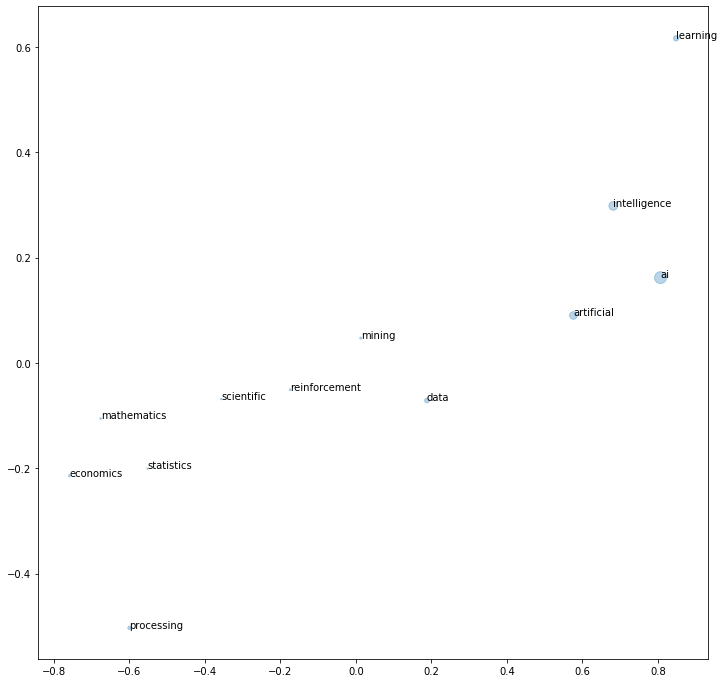

In [21]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_embedded = embedding.fit_transform(wordvecs)
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X_embedded[:,0], X_embedded[:,1], s=CountTerminosDeInteres, alpha=0.3)

for i, txt in enumerate(TerminosDeInteres):
    ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))

In [80]:
from gensim.models import Word2Vec
model2 = Word2Vec(
        [all_words[0][0].split()],
        size=10,
        window=6,
        min_count=1,
        sg= 0, #1 for skip-gram; otherwise CBOW
        workers=10)
model2.train([all_words[0][0].split()], total_examples=len([all_words[0][0].split()]), epochs=10)

(53275, 57240)

In [81]:
model2.wv.most_similar(positive=['intelligence'],topn=6)

[('may', 0.998458981513977),
 ('ai', 0.9982806444168091),
 ('approaches', 0.9975531101226807),
 ('research', 0.997254490852356),
 ('many', 0.9969410300254822),
 ('machine', 0.9969082474708557)]

### Skip-gram

In [78]:
from gensim.models import Word2Vec
model2 = Word2Vec(
        [all_words[0][0].split()],
        size=10,
        window=6,
        min_count=1,
        sg= 1, #1 for skip-gram; otherwise CBOW
        workers=10)
model2.train([all_words[0][0].split()], total_examples=len([all_words[0][0].split()]), epochs=10)

(53275, 57240)

In [79]:
model2.wv.most_similar(positive=['intelligence'],topn=6)

[('artificial', 0.9911572933197021),
 ('moral', 0.9842232465744019),
 ('symbolic', 0.9834890961647034),
 ('research', 0.9820720553398132),
 ('development', 0.980772852897644),
 ('concerned', 0.9801471829414368)]

It also have options for hierarchical softmax or negative sampling:


- **hs** ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
- **negative** (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.

### There are other two widely used representations based on Matrix factorization:

These methods utilize low-rank approximations to decompose large matrices that
capture statistical information about a corpus. That means that this methods are unsupervised in comparison to skip-gram and CBOW that are supervised.

- **Latent Semantic Analysis**: Based on tf-idf representation http://lsa.colorado.edu/papers/dp1.LSAintro.pdf

- **Global vectos (GoVe)**: Based on the co-occurrence matrix https://nlp.stanford.edu/pubs/glove.pdf

<div class="alert alert-block alert-warning">

Different pretrained GloVe embeddings can be download from [here](https://nlp.stanford.edu/projects/glove/). The lightest file is more than 800 Mb, so a tutorial for its use can be found in the following [link](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)
    
</div>    

In [84]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 104.8/104.8MB downloaded


## Keras Embedding

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim = 4, input_length=3))
model.compile(optimizer = 'adam', loss='mse')
print(model.predict(np.array([[4,8,3]])))

[[[ 0.02357093  0.02092982 -0.04955918 -0.01931781]
  [ 0.03651024  0.04621916 -0.04629884  0.00012832]
  [-0.04131331 -0.02115368 -0.03124855  0.02596796]]]


### Transfer learning!

The embedding weights can be replaced by pretrained word2vec weights and used into the the network:

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
inputs = Input(shape=(3,))
e = Embedding(input_dim=100, output_dim = 4, weights = [np.random.normal(0,1,size=(100,4))],trainable = False)(inputs)
model = Model(inputs=inputs,outputs=e)
model.compile(optimizer = 'adam', loss='mse')
print(model.predict(np.array([[4,8,3]])))

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 3, 4)              400       
Total params: 400
Trainable params: 0
Non-trainable params: 400
_________________________________________________________________
